Total N° created lines: 1000
N° of negligible lines: -13
N° of cosmic rays passing through both detectors: 98


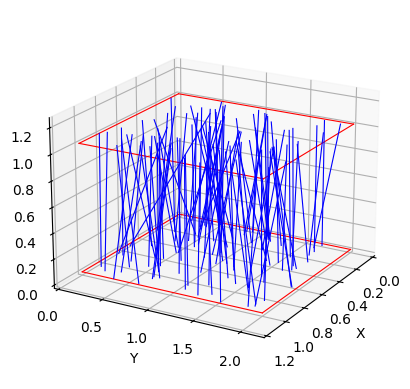

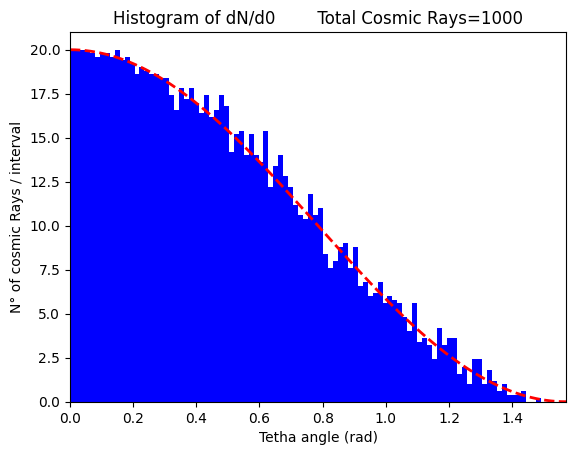

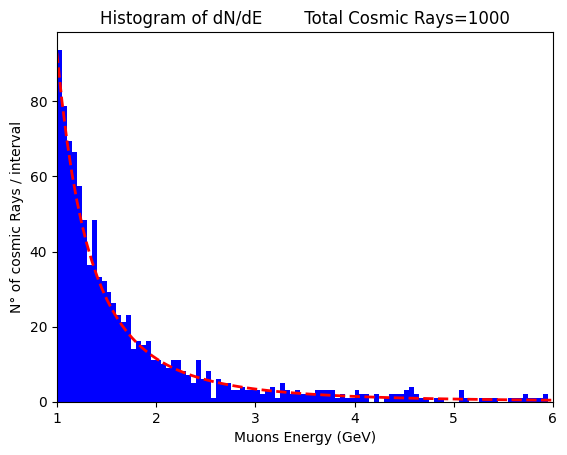

Particle N°0 Velocity =0.995684 c^2
Particle N°1 Velocity =0.995795 c^2
Particle N°2 Velocity =0.995473 c^2
Particle N°3 Velocity =0.995560 c^2
Particle N°4 Velocity =0.995443 c^2
Particle N°5 Velocity =0.995428 c^2
Particle N°6 Velocity =0.995455 c^2
Particle N°7 Velocity =0.995773 c^2
Particle N°8 Velocity =0.995729 c^2
Particle N°9 Velocity =0.995646 c^2
Particle N°10 Velocity =0.995449 c^2
Particle N°11 Velocity =0.995571 c^2
Particle N°12 Velocity =0.995791 c^2
Particle N°13 Velocity =0.995783 c^2
Particle N°14 Velocity =0.995500 c^2
Particle N°15 Velocity =0.995516 c^2
Particle N°16 Velocity =0.995768 c^2
Particle N°17 Velocity =0.995506 c^2
Particle N°18 Velocity =0.995745 c^2
Particle N°19 Velocity =0.995714 c^2
Particle N°20 Velocity =0.995566 c^2
Particle N°21 Velocity =0.995806 c^2
Particle N°22 Velocity =0.995483 c^2
Particle N°23 Velocity =0.995672 c^2
Particle N°24 Velocity =0.995482 c^2
Particle N°25 Velocity =0.995638 c^2
Particle N°26 Velocity =0.995780 c^2
Particle N°

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import detectorlib2                                      #Our library

#Detector 1 ========================================================

d1=detectorlib2.detector("Detector N°1",[0.5,1.,0.],1.,2.,[],[])     #(name,pos,lenx,leny,corner,edge)
d1.corners(); d1.edges()

#Detector 2 ========================================================

d2=detectorlib2.detector("Detector N°1",[0.5,1.,1.],1.,2.,[],[])
d2.corners(); d2.edges()

#Cosmic Rays =======================================================
# This piece of code, creates the lines (random cosmic rays path)

#***
N=1000; ray_distances=[1.,2.,2.0]                             #DEFAULT [0.5,1.,2.0]
R=100 ; R_energy=R ; mass= 0.1057 #GeV/c**2                 #R is N° of intervals for the Histogram
count=0; Energy_max=6                                         #N° of cosmic rays passing through both detectors
D=detectorlib2.distribtetha(N,R)
E=detectorlib2.distribEnergy(N,R_energy,Energy_max)
#line_array=np.zeros(N, dtype=list)
line_array=[]; velocity_array=[]
n=0;i=t=0

for j in range(len(D)):
    t=0
    while t < round(D[j]):
        if i < N:
        #if len(line_array) <= N:
            k=detectorlib2.lines([0.5,1.,5.],[0.,0.,0.])         #DEFAULT ([0.5,1.,2.],[0.,0.,0.]) ([origen],[direction])
            line_array.append(k.createline(ray_distances,R,j))
            t+=1; i+=1
        else:
            break
    H1=(Energy_max-1)/R_energy;i=0
for j in range(len(E)):
    t=0
    while t < round(E[j]):
        if i < N:
            muon_energy=random.uniform(j*H1+1,(j+1)*H1+1)
            velocity_array.append(detectorlib2.velocity_beta(muon_energy,mass))
            t+=1;i+=1
        else:
            break
print("Total N° created lines:",N)
print("N° of negligible lines:", N-len(line_array))

#***
    #line_array[i][1]=detectorlib2.vec_unit(line_array[i][1])
    #print(line_array[i][1])                                         Test line


#Plot =============================================================

fig = plt.figure()                          #We create the R3 space
ax = fig.add_subplot(111, projection='3d')

# Define the axis space limits
ax.set_xlim([0, 1.2])   # Limits for x axis
ax.set_ylim([0, 2.2])   # Limits for x axis
ax.set_zlim([-0., 1.25]) # Limits for z axis

#Plot detectors
for i in range (0,len(d1.edge)): #This loop calls all the detectors edge coordinates and plot them
    ax.plot(d1.edge[i][0], d1.edge[i][1], d1.edge[i][2], marker=None, color="red",linewidth=0.8)
    ax.plot(d2.edge[i][0], d2.edge[i][1], d2.edge[i][2], marker=None, color="red",linewidth=0.8)

#Plot lines
#t = np.linspace(0., 1., 2)
for i in range(len(line_array)):
    p1=detectorlib2.intersect(line_array[i][0],line_array[i][1],d1.pos[2])      #(inipoint,direction_vect,z_plane)
    p2=detectorlib2.intersect(line_array[i][0],line_array[i][1],d2.pos[2]) 
    c1=detectorlib2.if_intersect(p1,d1.pos,d1.lenx,d1.leny)                     #if_intersect(point,pos,lenx,leny)
    c2=detectorlib2.if_intersect(p2,d2.pos,d2.lenx,d2.leny)
    if c1 == True and c2 == True:
        t_initial=(d2.pos[2]-line_array[i][0][2])/line_array[i][1][2]
        t_final=(d1.pos[2]-line_array[i][0][2])/line_array[i][1][2]
        t = np.linspace(t_initial,t_final,2)                                   #This conditional filters the path that 
        q1=line_array[i][1][0]*t+line_array[i][0][0]                           #satisfies the passage through both detectors
        q2=line_array[i][1][1]*t+line_array[i][0][1]
        q3=line_array[i][1][2]*t+line_array[i][0][2]
        count+=1
        ax.plot(q1,q2,q3,color="blue",linewidth=0.8)
    
#Axis Labels    
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=20, azim=30)  #Point of view control
print("N° of cosmic rays passing through both detectors:",count)
plt.show()

# Tetha Histogram =================================================================================

range_hist=np.zeros(R, dtype=float)
for i in range(R):
    range_hist[i]=(i+0.5)*(np.pi/2)/R
plt.bar(range_hist,D, width=(np.pi/2)/R,color="Blue", edgecolor=None)
#plt.bar(range_hist,D, width=(np.pi/2)/R,color="yellow", edgecolor='black')
tetha_test=np.linspace(0,np.pi/2,100)
p=D[0]*(np.pi/4)*detectorlib2.prob(tetha_test)
plt.plot(tetha_test,p, linewidth=2, color="red", linestyle="--")
plt.xlim(0, np.pi/2)

# Agregar etiquetas y título
plt.xlabel('Tetha angle (rad)')
plt.ylabel('N° of cosmic Rays / interval')
plt.title(f'Histogram of dN/d0        Total Cosmic Rays={N}')

# Mostrar la gráfica
plt.show()

# Energy Histogram =================================================================================

range_hist_E=np.zeros(R_energy, dtype=float)
for i in range(R_energy):
    range_hist_E[i]=1+(i+0.5)*(Energy_max-1)/R_energy
    #print(range_hist[i])
plt.bar(range_hist_E,E, width=(Energy_max-1)/R_energy,color="Blue", edgecolor=None)
#plt.bar(range_hist_E,E, width=(Energy_max-1)/R_energy,color="yellow", edgecolor="Black")
energy_test=np.linspace(1,Energy_max,100)
p1=E[0]*0.49166*detectorlib2.probE(energy_test)
plt.plot(energy_test,p1, linewidth=2, color="red", linestyle="--")
plt.xlim(1,Energy_max)

# Agregar etiquetas y título
plt.xlabel('Muons Energy (GeV)')
plt.ylabel('N° of cosmic Rays / interval')
plt.title(f'Histogram of dN/dE        Total Cosmic Rays={N}')

# Mostrar la gráfica
plt.show()

# Velocity array===================================================================================

for i in range(len(velocity_array)):
    print(f"Particle N°{i} Velocity ={velocity_array[i]:.6f} c^2")
    #2.99792458E8

